# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e'

In [8]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=lebu
Processing Record 2 | Langsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=langsa
Processing Record 3 | Pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=pisco
City not found. Skipping...
Processing Record 4 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=bluff
Processing Record 5 | Chunskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=chunskiy
Processing Record 6 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=tuktoyaktuk
Processing Record 7 | Huarmey
http://api.openweathermap.org/data/2.5/weathe

Processing Record 56 | Camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=camacha
Processing Record 57 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=punta arenas
Processing Record 58 | Broken Hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=broken hill
Processing Record 59 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=carnarvon
Processing Record 60 | Lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=lata
Processing Record 61 | Bahia Blanca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=bahia blanca
Processing Record 62 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c2032227403

Processing Record 112 | Sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=sitka
Processing Record 113 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=kruisfontein
Processing Record 114 | Badin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=badin
Processing Record 115 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=norman wells
Processing Record 116 | Tabuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=tabuk
Processing Record 117 | Barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=barrow
City not found. Skipping...
Processing Record 118 | Mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7

City not found. Skipping...
Processing Record 168 | Troitsko-Pechorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=troitsko-pechorsk
Processing Record 169 | Twin Falls
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=twin falls
Processing Record 170 | Finnsnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=finnsnes
Processing Record 171 | Seybaplaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=seybaplaya
Processing Record 172 | Bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=bud
Processing Record 173 | Airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=airai
Processing Record 174 | Tarpon Springs
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 223 | Lima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=lima
Processing Record 224 | Hounde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=hounde
Processing Record 225 | Noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=noumea
Processing Record 226 | Ostersund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=ostersund
Processing Record 227 | Fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=fortuna
Processing Record 228 | Comodoro Rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=comodoro rivadavia
Processing Record 229 | Nampula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c203222740339220

Processing Record 279 | Belmonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=belmonte
Processing Record 280 | West Melbourne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=west melbourne
Processing Record 281 | Solnechnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=solnechnyy
Processing Record 282 | Ust-Kulom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=ust-kulom
Processing Record 283 | Nago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=nago
Processing Record 284 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=nikolskoye
Processing Record 285 | Ribeiropolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c

Processing Record 334 | Haines Junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=haines junction
Processing Record 335 | Bridlington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=bridlington
Processing Record 336 | Clyde River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=clyde river
Processing Record 337 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=palmer
Processing Record 338 | Pacific Grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=pacific grove
Processing Record 339 | Saint Anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=saint anthony
Processing Record 340 | Pak Phanang
http://api.openweathermap.org/data/2.5/weather?units

Processing Record 390 | Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=saint-pierre
Processing Record 391 | Glendive
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=glendive
Processing Record 392 | Visnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=visnes
Processing Record 393 | Nizhnyaya Omka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=nizhnyaya omka
Processing Record 394 | Ginda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=ginda
Processing Record 395 | Sipovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=sipovo
Processing Record 396 | Puteyets
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c203222740339

Processing Record 446 | Nador
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=nador
Processing Record 447 | Den Helder
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=den helder
Processing Record 448 | Berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=berlevag
Processing Record 449 | Nenjiang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=nenjiang
Processing Record 450 | Dongsheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=dongsheng
Processing Record 451 | Enshi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=enshi
Processing Record 452 | Alyangula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q

Processing Record 500 | Mwinilunga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=mwinilunga
Processing Record 501 | Mayor Pablo Lagerenza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=mayor pablo lagerenza
Processing Record 502 | Roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=roald
Processing Record 503 | Trani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=trani
Processing Record 504 | Lang Son
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=lang son
City not found. Skipping...
Processing Record 505 | Marawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=marawi
Processing Record 506 | Aleksandrov Gay
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 554 | Sioux Lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=sioux lookout
Processing Record 555 | Aquin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=aquin
Processing Record 556 | Naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=naze
City not found. Skipping...
Processing Record 557 | Bantigue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=bantigue
Processing Record 558 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=lavrentiya
Processing Record 559 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3679a7a977c20322274033922028157e&q=touros
Processing Record 560 | Toora-Khem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=367

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          567
Cloudiness    567
Country       567
Date          567
Humidity      567
Lat           567
Lng           567
Max Temp      567
Wind Speed    567
dtype: int64

In [11]:
# Save data frame to CSV
weather_data.to_csv('Output_CSV/weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lebu,75,ET,1563119239,68,8.96,38.73,64.40,6.93
1,Langsa,100,ID,1563119240,97,4.47,97.97,70.43,1.95
2,Pisco,90,PE,1563118958,30,-13.71,-76.20,71.60,4.70
3,Bluff,59,AU,1563119243,50,-23.58,149.07,46.85,6.17
4,Chunskiy,100,RU,1563119244,96,56.08,99.63,58.01,2.64


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

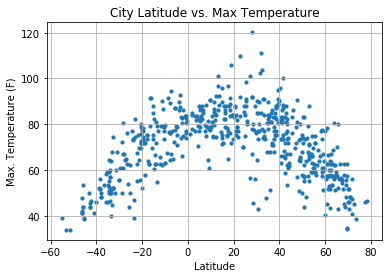

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

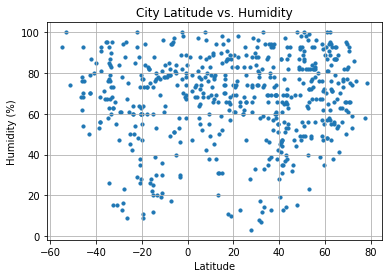

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

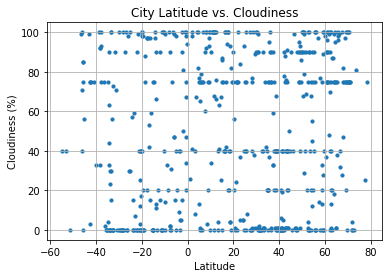

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

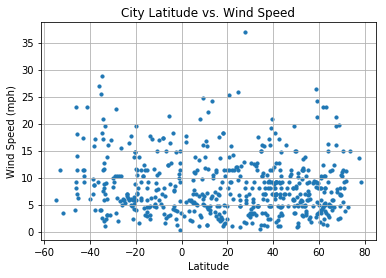

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()